<a href="https://colab.research.google.com/github/dancher00/HPPL/blob/main/HPPL2025_Lec2_profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The first step is always to find the bottlenecks in your code, via _profiling_: analyzing your code by measuring the execution time of its parts.


Tools:
------

2. `cProfile`
4. `snakeviz`
1. [`line_profiler`](https://github.com/rkern/line_profiler)
3. `timeit`



```console
pip install line_profiler
```

In [ ]:
import numpy
from time import sleep

def sleepy(time2sleep):
    sleep(time2sleep)

def supersleepy(time2sleep):
    sleep(time2sleep)

def randmatmul(n=1000):
    a = numpy.random.random((n,n))   # by default float64
    b = a @ a      # a * a  ---> Hadamard product (elementwise)
    return b

def useless(a):
    if not isinstance(a, int):
        return

    randmatmul(a)

    ans = 0
    for i in range(a):
        ans += i

    sleepy(1.0)
    supersleepy(2.0)

    return ans

## using `cProfile`

[`cProfile`](https://docs.python.org/3.4/library/profile.html#module-cProfile) is the built-in profiler in Python (available since Python 2.5).  It provides a function-by-function report of execution time. First import the module, then usage is simply a call to `cProfile.run()` with your code as argument. It will print out a list of all the functions that were called, with the number of calls and the time spent in each.

from the command line:
`python -m cProfile -s tottime script.py`

to output in the file
`python -m cProfile -o output.pstats script.py`

to create a graph of dependencies + timing:
`gprof2dot -f pstats output.pstats | dot -Tpng -o output.png`

In [ ]:
import cProfile

cProfile.run('useless(1000)')

### write stats to the file
cProfile.run('useless(1000)', 'statistics')
# python -m cProfile [-o output_file] [-s sort_order] (-m module | myscript.py)

'''

ncalls

    for the number of calls.

tottime

    for the total time spent in the given function
    (and excluding time made in calls to sub-functions)

percall

    is the quotient of tottime divided by ncalls

cumtime

    is the cumulative time spent in this and all subfunctions
    (from invocation till exit). This figure is accurate even
    for recursive functions.

percall

    is the quotient of cumtime divided by primitive calls

filename:lineno(function)

    provides the respective data of each function

'''


         587 function calls (568 primitive calls) in 3.063 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.000    0.000 <frozen abc>:121(__subclasscheck__)
        5    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1390(_handle_fromlist)
      2/1    0.000    0.000    3.060    3.060 <string>:1(<module>)
        1    0.000    0.000    0.001    0.001 _base.py:337(_invoke_callbacks)
        1    0.000    0.000    0.001    0.001 _base.py:537(set_result)
        1    0.000    0.000    0.000    0.000 asyncio.py:206(_handle_events)
        1    0.000    0.000    0.000    0.000 asyncio.py:231(add_callback)
        5    0.000    0.000    0.000    0.000 attrsettr.py:43(__getattr__)
        5    0.000    0.000    0.000    0.000 attrsettr.py:66(_get_attr_opt)
        2    0.000    0.000    0.000    0.000 base_events.py:1907(_add_callback)
        3    0.000    0.000    0.002    0.001 ba

'\n\nncalls\n\n    for the number of calls.\n\ntottime\n\n    for the total time spent in the given function\n    (and excluding time made in calls to sub-functions)\n\npercall\n\n    is the quotient of tottime divided by ncalls\n\ncumtime\n\n    is the cumulative time spent in this and all subfunctions\n    (from invocation till exit). This figure is accurate even\n    for recursive functions.\n\npercall\n\n    is the quotient of cumtime divided by primitive calls\n\nfilename:lineno(function)\n\n    provides the respective data of each function\n\n'

In [ ]:
import pstats
from pstats import SortKey
p = pstats.Stats('statistics')
p.strip_dirs().sort_stats(-1).print_stats()

Thu Oct 30 06:21:23 2025    statistics

         546 function calls (542 primitive calls) in 3.054 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.000    0.000 <frozen abc>:121(__subclasscheck__)
        4    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1390(_handle_fromlist)
        1    0.000    0.000    3.054    3.054 <string>:1(<module>)
        4    0.000    0.000    0.000    0.000 __init__.py:183(dumps)
        2    0.000    0.000    0.000    0.000 _weakrefset.py:85(add)
        2    0.000    0.000    0.001    0.000 asyncio.py:206(_handle_events)
        1    0.000    0.000    0.000    0.000 asyncio.py:216(call_at)
        3    0.000    0.000    0.000    0.000 attrsettr.py:17(__setattr__)
        1    0.000    0.000    0.000    0.000 attrsettr.py:39(_set_attr_opt)
        4    0.000    0.000    0.000    0.000 attrsettr.py:43(__getattr__)
        4    0.000    0.000   

## using `snakeviz`

`pip install snakeviz`

In [ ]:
%load_ext snakeviz

ModuleNotFoundError: No module named 'snakeviz'

In [ ]:
%snakeviz useless(10000)

In [ ]:
!pip install line_profiler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.5 MB/s eta 0:00:00


## using `line_profiler`

`pip install line_profiler`

`line_profiler` offers more granular information than `cProfile`: it will give timing information about each line of code in a profiled function.

### For a pop-up window with results in notebook:

IPython has an `%lprun` magic to profile specific functions within an executed statement. Usage:
`%lprun -f func_to_profile <statement>` (get more help by running `%lprun?` in IPython).

In [ ]:
def master():
    useless(3000)
    print('hello')

%load_ext line_profiler
%lprun -f useless master()

hello


### Write results to a text file

In [ ]:
%lprun -T timings.txt -f sleepy useless(1000)

## Profiling on the command line

Open file, add `@profile` decorator to any function you want to profile, then run

```console
kernprof -l script_to_profile.py
```

which will generate `script_to_profile.py.lprof` (pickled result).  To view the results, run

```console
python -m line_profiler script_to_profile.py.lprof
```

In [ ]:
from IPython.display import IFrame
IFrame('http://localhost:8888/terminals/1', width=800, height=700)

## `timeit`

```python
python -m timeit "print(42)"
```


In [ ]:
# line magic
%timeit x=10

In [ ]:
%%timeit
# cell magic

x=10
a='hello'
d=[1,2,3]

In [ ]:
import requests
import cProfile


def lenta():
    requests.get('https://lenta.ru')


def arxiv():
    requests.get('https://arxiv.org')
def kremlin():
    requests.get('https://kremlin.ru')
def vk():
    requests.get('https://vk.com')


def main():
    lenta()
    arxiv()
    kremlin()
    vk()

cProfile.run('main()')

memory_profiler
=====

1. `pip install memory_profiler`

In [ ]:
!pip install memory_profiler

In [ ]:
%load_ext memory_profiler

In [ ]:
import numpy as np

In [ ]:
%memit a = np.linspace(0, 1, 100000000)

peak memory: 880.39 MiB, increment: 763.30 MiB


In [ ]:
%%writefile main.py

from memory_profiler import profile

@profile
def process_strs(reps=10**6):
	str1 = 'python'*reps
	str2 = 'programmer'*reps
	str3 = str1 + str2
	del str2
	return str3

process_strs(reps=10**7)

Writing main.py


In [ ]:
!python main.py

Filename: /content/main.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     4     38.0 MiB     38.0 MiB           1   @profile
     5                                         def process_strs(reps=10**6):
     6     95.2 MiB     57.2 MiB           1   	str1 = 'python'*reps
     7    190.6 MiB     95.4 MiB           1   	str2 = 'programmer'*reps
     8    343.2 MiB    152.6 MiB           1   	str3 = str1 + str2
     9    247.9 MiB    -95.3 MiB           1   	del str2
    10    247.9 MiB      0.0 MiB           1   	return str3




In [ ]:
!mprof run --python main.py



mprof: Sampling memory every 0.1s
running new process
running as a Python program...
Filename: main.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     4     37.7 MiB     37.7 MiB           1   @profile
     5                                         def process_strs(reps=10**6):
     6     94.9 MiB     57.2 MiB           1   	str1 = 'python'*reps
     7    190.3 MiB     95.4 MiB           1   	str2 = 'programmer'*reps
     8    342.9 MiB    152.6 MiB           1   	str3 = str1 + str2
     9    247.7 MiB    -95.2 MiB           1   	del str2
    10    247.7 MiB      0.0 MiB           1   	return str3




In [ ]:
!ls

main.py  mprofile_20241030072031.dat  sample_data


In [ ]:
!mprof plot -o output.png



Using last profile data.


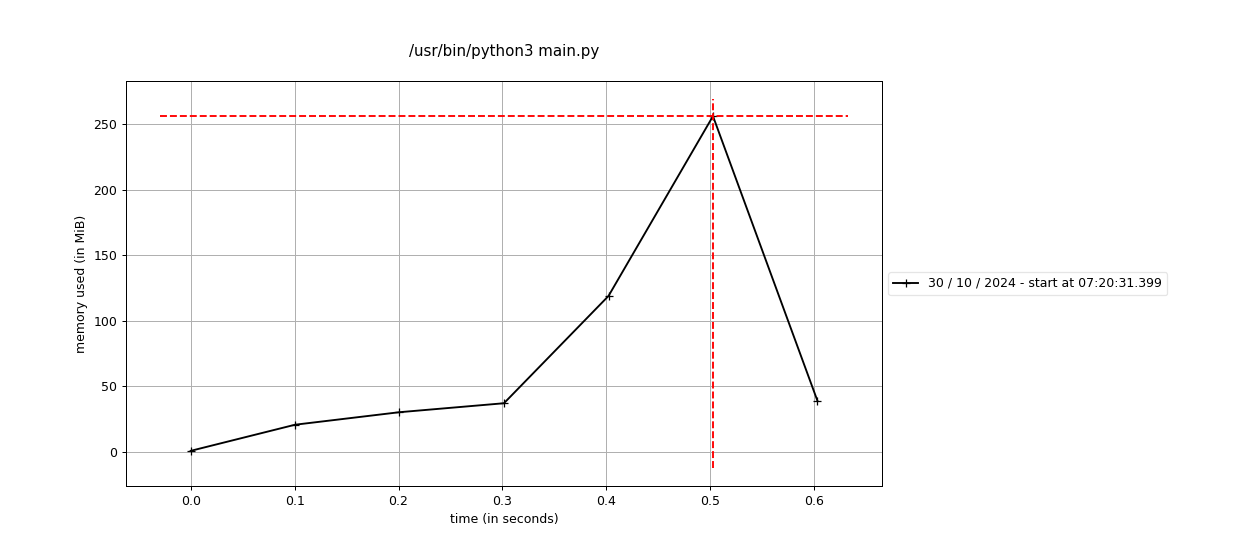

In [ ]:
from IPython.display import Image
Image(filename='output.png')

In [ ]:
!time echo "hello"

hello

real	0m0.000s
user	0m0.000s
sys	0m0.000s
